In [2]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

In [3]:
import pytesseract
import numpy as np
import cv2  # OpenCV
from google.colab.patches import cv2_imshow # Para mostrar as imagens no colab

In [4]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144
Receiving objects: 100% (148/148), 37.21 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (35/35), done.


### Introdução ao Tesseract OCR: 🤖

OCR = Reconhecimento de caractéres opticos, convertendo a imagem de texto num formato de texto legível à máquina. Para tanto, há certas etapas, que são:
- Aquisição da imagem;
- Pré-processamento;
- Reconhecimento de padrões;
- Detecção de recursos

Uma das vantagens dessa técnica é que ela pode retirar textos tanto de imagens quanto de PDF's. Porém é importante entender como ela funciona:

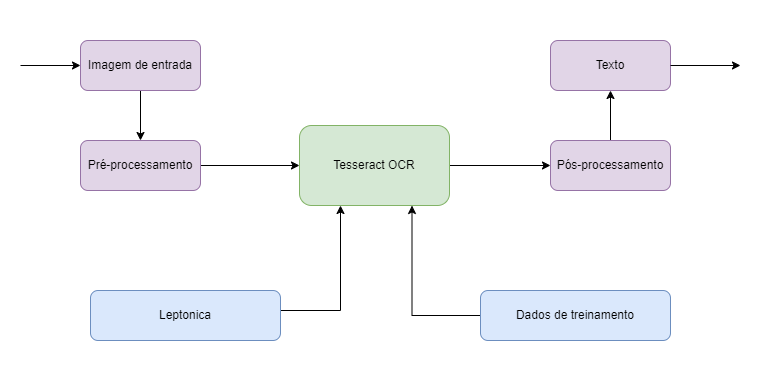

De modo principal temos os dados de entrada e saída em roxo, enquanto que os azuis se referem àquilo que não é codificado por nós, sendo bibliotecas já prontas, que guardam tanto material de treinamento quanto atributos necessários à interpretação.

Em roxo, temos:
- Imagem de entrada:
gerada a partir da aquisição da imagem por um scanner/câmera que lê o documento e transforma em dados binários. O software de OCR analisa a imagem digitalizada e classifica as áreas claras como plano de fundo e as áreas escuras como texto.

- Pré-processamento:
limpeza da imagem, remoção de erros, troca de cores, a fim de prepará-la para a leitura.
Reconhecimento de texto com Tesseract OCR: Os dois principais tipos de algoritmo de OCR ou processos de software que um software de OCR usa para reconhecimento de texto são chamados de reconhecimento de padrões e detecção de recursos.
- Reconhecimento de padrões
Os programas OCR são alimentados com exemplos de texto em várias fontes e formatos que são usados para comparar e reconhecer caracteres no documento digitalizado.
- Detecção de recursos:
Os programas de OCR aplicam regras relacionadas aos recursos de uma letra ou número específico para reconhecer caracteres no documento digitalizado. Os recursos podem incluir o número de linhas angulares, linhas cruzadas ou curvas em um caractere para comparação. Por exemplo, a letra maiúscula “A” pode ser armazenada como duas linhas diagonais que se encontram com uma linha horizontal no meio.
- Pós-processamento:
Após a análise, o sistema converte os dados de texto extraídos em um arquivo informatizado. Alguns sistemas de OCR podem criar arquivos PDF anotados que incluem versões anteriores e posteriores do documento digitalizado.
Texto: Resultado final da extração.

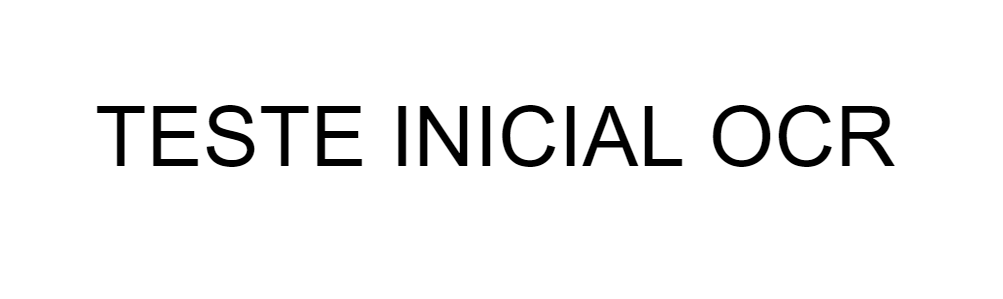

In [5]:
img = cv2.imread("/content/text-recognize/Imagens/Aula1-teste.png")

cv2_imshow(img)



In [6]:
# Retirando o texto da imagem.

texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



**Imagem BGR:**

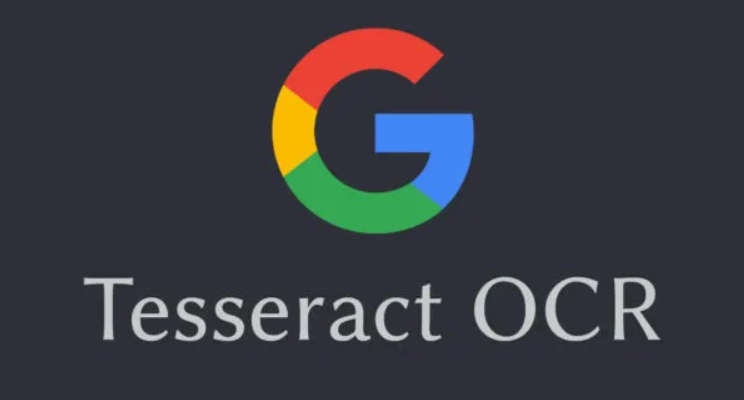

In [7]:
img_bgr = cv2.imread("/content/text-recognize/Imagens/Aula1-ocr.png")
cv2_imshow(img_bgr)

Por padrão quando envia-se uma imagem ao OpenCV, ele realiza uma inversão das cores para bgr, o oposto do rgb, que é comumente utilizado para a leitura de "n" bibliotecas. Nesse sentido, faz-se necessário a reconversão, a qual é feito por meio da função cvtColor, vejamos abaixo:

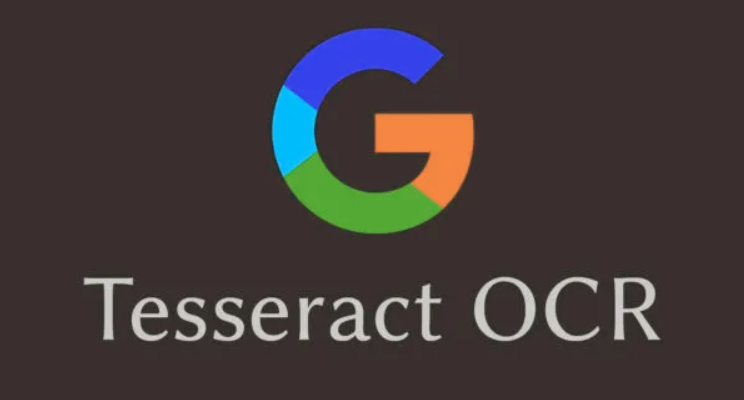

In [8]:
rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

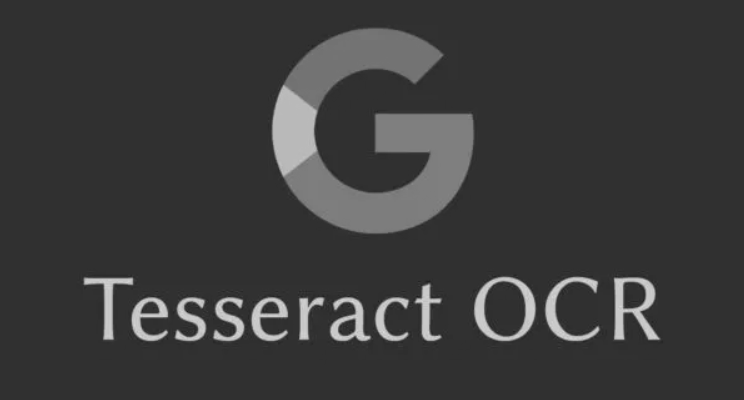

In [9]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [10]:
# Retirando o texto da imagem.

texto = pytesseract.image_to_string(gray)
print(texto)

C

Tesseract OCR



### Tratando caractéres diferentes: 🛰️

In [11]:
def extrai_texto(conteudo):

  # Lê a imagem
  img_bgr = cv2.imread(conteudo)

  # Transforma de BGR para RGB e a plota:
  rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  cv2_imshow(rgb)

  print("")
  print("")


  # Retirando o texto da imagem:

  # Por padrão, o pytesseract trabalha com o idioma em inglês,
  # de modo que para informarmos que estamos analisando textos
  # em português é necessário informar, para que desse modo realize
  # uma boa leitura.

  texto = pytesseract.image_to_string(rgb, lang = "por")
  print(texto)

  return None

Note que o pytesserecat apresenta algumas dificuldades para ler algumas palavras, tais como frequência e observações, se olhar a imagem logo acima. Mas por que isso ocorre? Bom, porque o tesseract não está trabalhando com o idioma português e, desse modo, a partir do que ele possui, entrega apenas aquilo que se assemelha com os idiomas que ele já traz de base. Para instalar o idioma, basta:

In [14]:
!apt-get install tesseract-ocr-por


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (3,180 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121799 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [15]:
# Para verificar quais idiomas há:

!tesseract --list-langs


List of available languages (3):
eng
osd
por


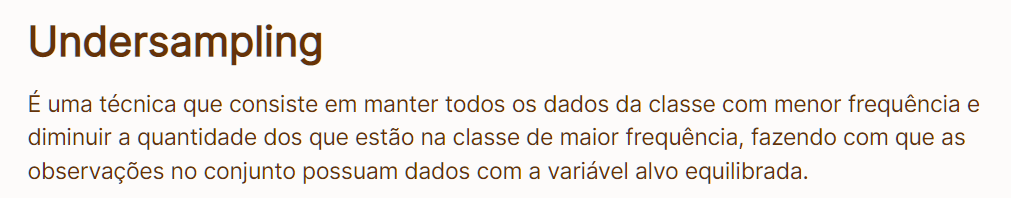



Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [16]:
# Verificando se a extração consegue ser realizada de uma melhor forma:

extrai_texto("/content/text-recognize/Imagens/Aula2-undersampling.png")

### Page Segmentation Mode:

É um recurso da visão computacional que serve para a disposição dos textos, configurando o modo como a máquina pode visualizar. Por padrão é esperado uma leitura estilo PDF, com os textos centralizados e todos na horizonta, porém nem sempre esse caso procede, o que faz necessário passar esse parâmetro.

In [17]:
# Tipos de segmentação disponíveis, por meio
# dos quais conseguimos "setar" a visualização
# da imagem de modo a tornar o arquivo à máquina legível:

!tesseract --help-psm


Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


**Para saber mais - todos os psms:**

https://cursos.alura.com.br/course/visao-computacional-reconhecimento-texto-ocr-opencv/task/113548

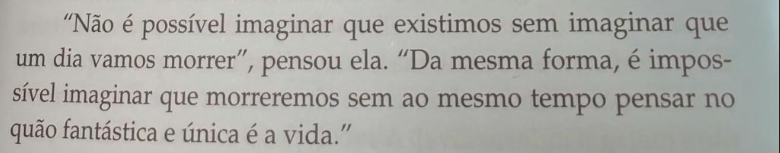

In [18]:
# Verificando a leitura de texto sem o psm:

img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [19]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata'

texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)


“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Nesse caso, o texto conseguiu ser extraído "de boas", porém nem sempre será assim, sendo que nesses cenários os erros podem ser retornados a partir de caractéres que fazem pouco sentido ou que simplesmente não retornam. De todo modo, posso passar o psm recomendado. Observando a imagem, nota-se que pode ser o psm 6.

In [20]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata --psm 6'

texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)


“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



**Python Imagin Libray:**

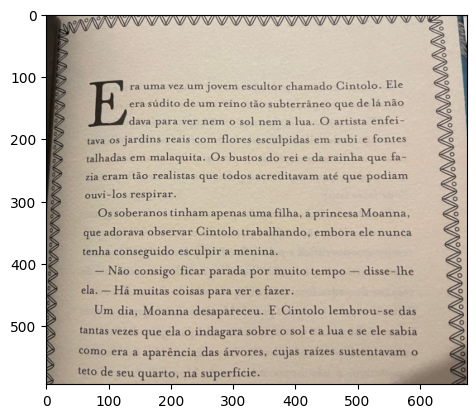

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);


In [23]:
print(pytesseract.image_to_osd(img))

# Retornando a orientação e script - código, linguagem -
# da página junto de um percentual de precisão.


Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



O uso do OCR é importante para saber sobre os metadados da imagem, como os que são mencionados acima, porém há como ter uma análise mais aprofundada.

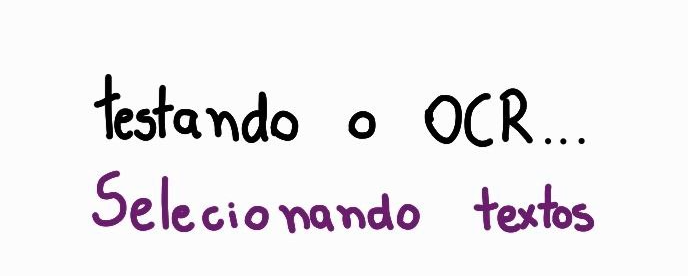

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 58, 95, 70, '-1', 91, 64],
 'text': ['',
  '',
  '',
  '',
  'testando',
  'o',
  'OCR...',
  '',
  'Selecionando',
  'tests']}

In [24]:
from pytesseract import Output

img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata '
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado


In [ ]:
# Analisando o dicionário acima, nota-se uma chave chamada 'conf', a qual
# se relaciona ao nível de confiança que o modelo tem acerca das palavras que
# ele encontrou, de modo que o -1 indica que não há palavras, enquanto que os
# outros valores o nível de cofiança que ele apresenta em relação ao o que fora
# encontrado.

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:

  > página
  >
  > bloco
  >
  > parágrafo
  >
  > linha
  >
  >  palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [25]:
min_conf = 41 #@param {type: 'slider', min: 0, max: 100}


### Melhorando a análise: 🔭

Um modo de melhorar a análise da computação visual é delimitarmos em uma caixa os textos que temos numa imagem. Para tanto:

In [26]:
# Criando uma função que cria caixas ao redor do texto:

def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


**Criando a caixa em volta do texto:**

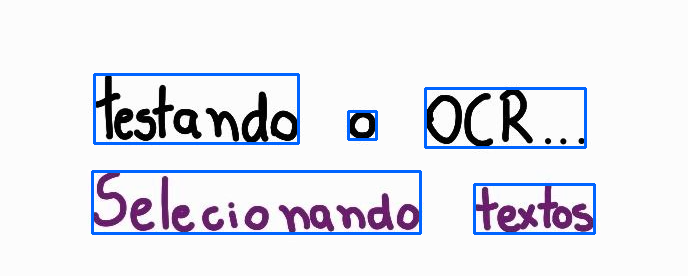

In [27]:
img_copia = rgb.copy()

for i in range(len(resultado["text"])):

  confianca = int(resultado["conf"][i])

  if confianca > min_conf:

    x, y, img = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


**Criando caixa e texto à análise de visão computacional:**

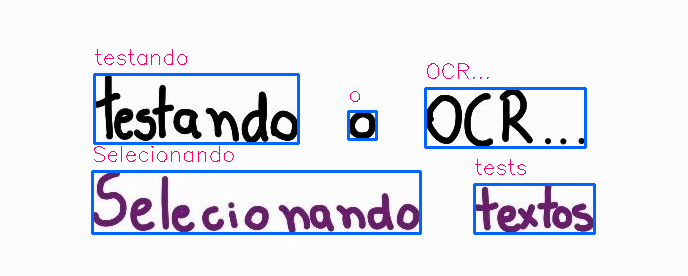

In [29]:
# Faz uma cópia da imagem original para desenhar as caixas delimitadoras e textos sem modificar a imagem original diretamente
img_copia = rgb.copy()

# Itera sobre os resultados obtidos na leitura de texto
for i in range(len(resultado['text'])):
    # Obtém a confiança na detecção do texto e converte para inteiro
    confianca = int(resultado['conf'][i])

    # Verifica se a confiança na detecção é maior que um valor mínimo (min_conf)
    if confianca > min_conf:
        # Chama a função caixa_texto para obter as coordenadas da caixa delimitadora e a imagem resultante
        x, y, img = caixa_texto(resultado, img_copia)

        # Obtém o texto detectado
        texto = resultado['text'][i]

        # Adiciona o texto sobre a imagem de cópia
        # As coordenadas (x, y - 10) são usadas para posicionar o texto acima da caixa delimitadora
        cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,0,255))

# Exibe a imagem resultante com as caixas delimitadoras e textos
cv2_imshow(img_copia)

**Utilizando fontes externas:** 🧩

Trazendo a nova imagem que será lida pelo OpenCV, mas acompanhado pela fonte externa especificada.

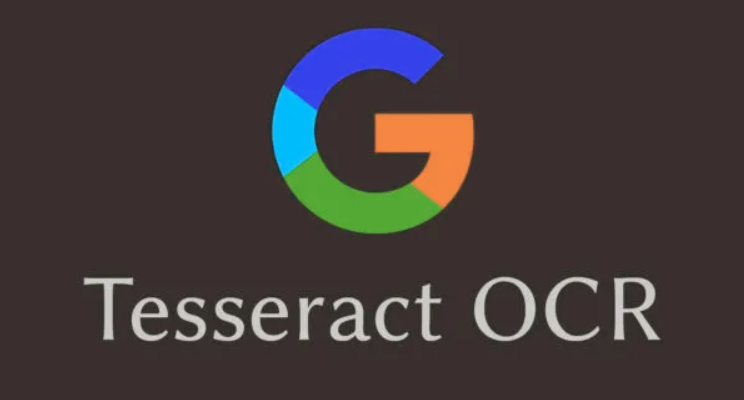

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 32, '-1', '-1', '-1', 91, 95],
 'text': ['', '', '', '', 'e', '', '', '', 'Tesseract', 'OCR']}

In [30]:
# Lê a imagem de um arquivo usando o OpenCV
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')

# Converte a imagem para o espaço de cores RGB usando OpenCV
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibe a imagem RGB usando a função cv2_imshow
cv2_imshow(rgb)

# Configuração do Tesseract OCR: especifica o diretório do modelo de dados do Tesseract

# Lembrando que o Tesseract é um software de reconhecimento de caractéres ópticos,
# construindo para identificar signos por meio de imagens, como letras e afins.

config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata '

# Usa o pytesseract para realizar a leitura de texto na imagem
# A função image_to_data retorna um dicionário contendo informações sobre as palavras detectadas, suas coordenadas, confiança, etc.
# Neste caso, a linguagem é configurada como 'por' (português)
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)

# Exibe o resultado da leitura de texto (um dicionário contendo informações sobre as palavras detectadas)
resultado


Mas por que devo adicionar uma fonte externa ? O principal motivo para isso é que as fontes que vêm por padrão do OpenCV apresenta uma fraqueza no que se refere aos caractéres especiais, de modo que não são capazes de reconhecê-los, retornando símbolos que não são identificáveis. Não obstante, as fontes externas podem ser arial, calibri, times new roman e etc.

In [31]:
# Para adicionar uma fonte externa, basta:

from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'


In [33]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  # Carrega a fonte a ser utilizada com o tamanho especificado
  fonte = ImageFont.truetype(fonte, tamanho_texto)

  # Converte a imagem NumPy para o formato da biblioteca Pillow (PIL)
  img_pil = Image.fromarray(img)

  # Cria um objeto de desenho para a imagem
  draw = ImageDraw.Draw(img_pil)

  # Adiciona o texto à imagem usando a posição (x, y - tamanho_texto) e a fonte especificada
  draw.text((x, y - tamanho_texto), texto, font=fonte)

  # Converte a imagem Pillow de volta para o formato NumPy
  img = np.array(img_pil)

  # Retorna a imagem resultante após a adição do texto
  return img


**OBS:** 👀

Note que há um trecho do código que estou transformando a imagem NumPy para formato da biblioteca Pillow, mas por quê ? Por padrão todas as imagens são processadas como se fossem um conjunto de vetores numa matriz, estando num formato NumPy, no sentido de que cada pixel apresenta um valor e dimensão. Quando realizo a transformação comentada, estou manejando tal item, como forma de poder manipular, retornando, ao fim da manipulação, a um formato NumPy.  


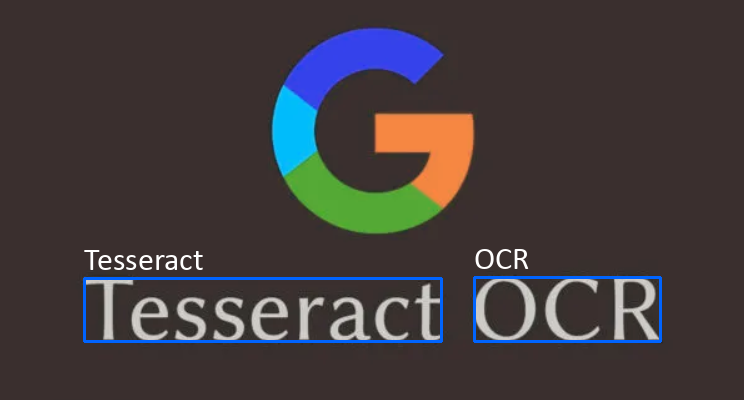

In [34]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)

# Veficando a nova leitura realizada por meio dessa abordagem.
# Nota-se que o G não foi lido, por quê ? Honestamente não sei,
# ainda que nos dicionários o software tenha reconhecido um "e",
# e não "g" em seu lugar. Talvez seja isso.


**Salvando imagens:** 📸

Por vezes é útil salvar as imagens já lidas pela máquina, de modo que agiliza o trabalho e etc. Para tanto, podemos seguir os passos seguintes:


In [35]:
# Importa o módulo 'os' para interagir com o sistema operacional
import os

# Cria o diretório 'images_tesseract' se ele não existir
os.makedirs('images_tesseract', exist_ok=True)

# Caminho para o arquivo de imagem a ser salvo
logo_tesseract = '/content/images_tesseract/logo_tesseract.png'

# Salva a imagem de cópia (img_copia) no diretório especificado
cv2.imwrite(logo_tesseract, img_copia)

**Busca de informações:** 🔎

No contexto de visão computacional pode ser que tenhamos a necessidade de buscar informações especificas num conjunto inteiro de imagens. Isso pode ser facilitado por meio da biblioteca RE (*Regular Expressions*), que auxilia no processo de encontrar termos que aparecem com elevada frequência.

In [37]:
# No site da Regex, biblioteca das expressões regulares, pode-se encontrar
# um código que "percebe" datas no formato "xx/xx/xxxx", que será usada
# para identificar as datas presentes na imagem a seguir:

padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


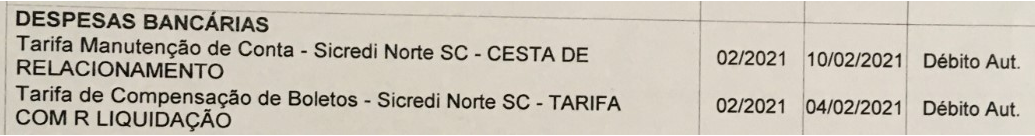

In [38]:
# Importando a biblioteca Regular Expressions:
import re

img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


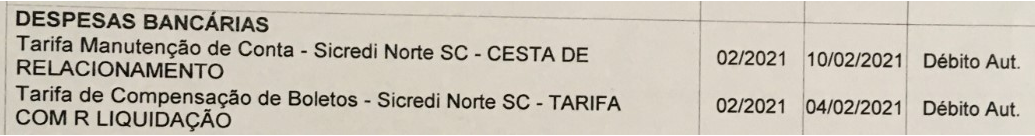

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [40]:
# Lê a imagem de um arquivo usando o OpenCV
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')

# Converte a imagem para o espaço de cores RGB usando OpenCV
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibe a imagem RGB usando a função cv2_imshow
cv2_imshow(rgb)

# Configuração do Tesseract OCR: especifica o diretório do modelo de dados do Tesseract

# Lembrando que o Tesseract é um software de reconhecimento de caractéres ópticos,
# construindo para identificar signos por meio de imagens, como letras e afins.

config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata '

# Usa o pytesseract para realizar a leitura de texto na imagem
# A função image_to_data retorna um dicionário contendo informações sobre as palavras detectadas, suas coordenadas, confiança, etc.
# Neste caso, a linguagem é configurada como 'por' (português)
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)

# Exibe o resultado da leitura de texto (um dicionário contendo informações sobre as palavras detectadas)
resultado


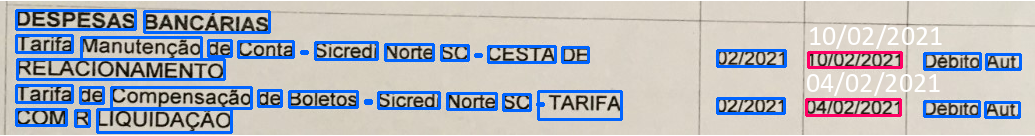

In [45]:
# Criando uma lista com as datas extraídas do arquivo.
datas = []

# Cria uma cópia da imagem original RGB
img_copia = rgb.copy()

# Itera sobre os resultados obtidos na leitura de texto
for i in range(0, len(resultado['text'])):
    # Obtém a confiança na detecção do texto e converte para inteiro
    confianca = int(resultado['conf'][i])

    # Verifica se a confiança na detecção é maior que um valor mínimo (min_conf)
    if confianca > min_conf:
        # Obtém o texto detectado
        texto = resultado['text'][i]

        # Verifica se o texto corresponde ao padrão de data usando a expressão regular (re.match)
        if re.match(padrao_data, texto):

            # Se o texto corresponder ao padrão de data, obtém as coordenadas da caixa delimitadora
            # e escreve o texto em tamanho 12 na imagem com a função escreve_texto.
            # Além disso, como último parâmetro, estou passando a cor das caixas-texto,
            # caso o cenário em que padrão_data dê match com o texto adquirido.

            x, y, img = caixa_texto(resultado, img_copia, (100, 0, 255))
            img_copia = escreve_texto(texto, x, y, img_copia, fonte,
                                      tamanho_texto=28)

            # Extraindo, em formato de lista, os termos lidos pela máquina:
            datas.append(texto)
        else:
            # Se o texto não corresponder ao padrão de data, obtém as coordenadas da caixa delimitadora
            x, y, img_copia = caixa_texto(resultado, img_copia)

# Exibe a imagem resultante com as caixas delimitadoras e textos
cv2_imshow(img_copia)


In [46]:
datas

['10/02/2021', '04/02/2021']

**Cenários Naturais:** ⛰️

Cenários naturais é o nome dado para situações não controladas, isto é, que não foram previamente cuidadas para que o software, sem um pré-tratamento, possam desempenhar de modo razoável / eficiente.

Quando estão presentes, por outro lado, não é incomum ocorrerem falsos positivos, que nesse contexto significa a identificação de palavras ou signos linguísticos que de fato não haviam. Vejamos:

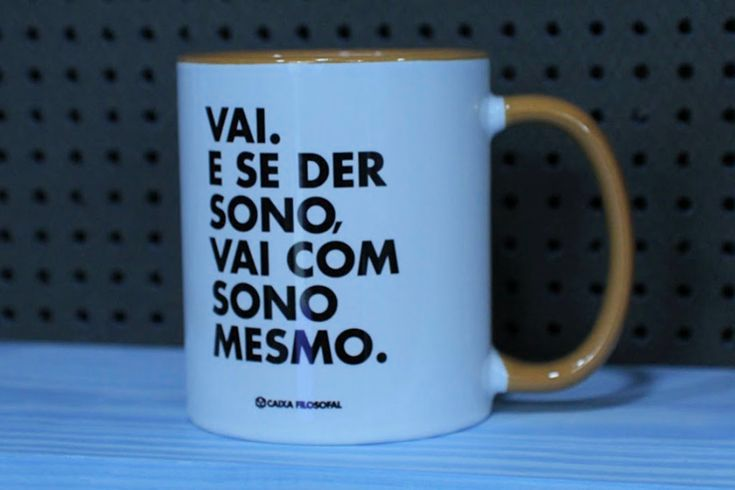

In [47]:
# Carregando uma nova imagem que não está em ambiente controlado:

img = cv2.imread('/content/text-recognize/Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [56]:
# Como essa caneca apresenta um bloco de texto, suponha-se que o
# psm utilizado será o psm 6, tendo em vista que parece apresentar
# um comportamento de bloco.

config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [57]:
# Criando o slider que armazena o mínimo de confiança:

min_conf = 40 #@param {type: 'slider', min: 0, max: 100}


É importante ao estabelecimento desse mínimo de confiança olhar o dicionário encontrado pelo OpenCV. A partir dele, conseguimos saber qual está sendo o mínimo de confiança que o software está conseguindo analisar os signos presentes na imagem. Desse modo, pode-se estabeler um mínimo de confiança um pouco abaixo daquilo encontrado no dicionário. Por exemplo, nesse caso o dicionário irá retornar que o mínimo de confiança é 48, enquanto isso estabeleço como esse sendo de 40.

In [58]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT, config=config_tesseract)
resultado


{'level': [1,
  2,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  188,
  188,
  188,
  188,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  263,
  263,
  575],
 'top': [0,
  103,
  103,
  10

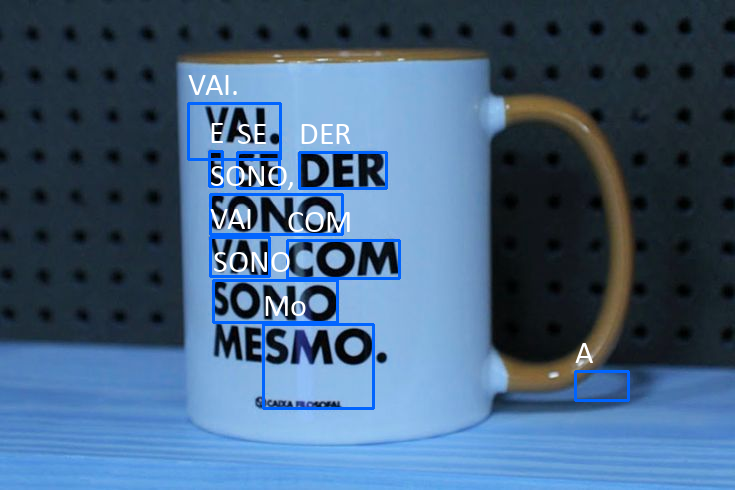

In [59]:
img_copia = rgb.copy()

for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)


Olha só, nesse caso o software não soube ler bem o conteúdo da imagem passada, de modo que ele não retornou o "mesmo", além de ter criado um falso positivo, que no caso foi o "A", que já era esperado por se tratar de um ambiente não controlado.

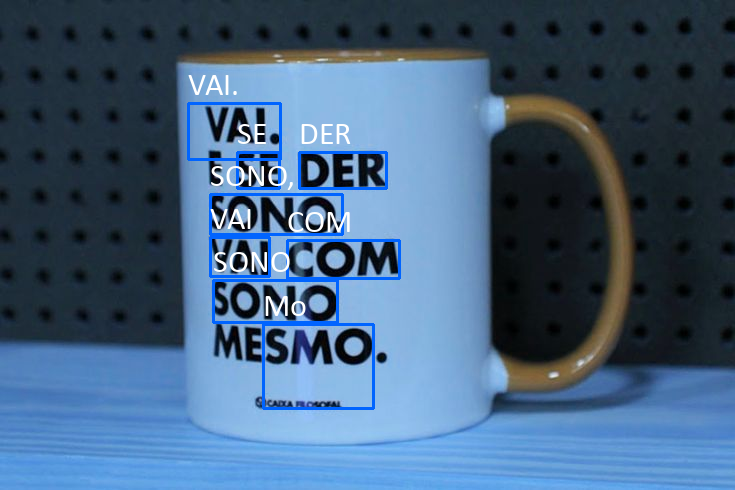

In [60]:
# Cria uma cópia da imagem original RGB
img_copia = rgb.copy()

# Itera sobre os resultados obtidos na leitura de texto
for i in range(0, len(resultado['text'])):
    # Obtém a confiança na detecção do texto e converte para inteiro
    confianca = int(resultado['conf'][i])

    # Verifica se a confiança na detecção é maior que um valor mínimo (min_conf)
    if confianca > min_conf:
        # Obtém o texto detectado
        texto = resultado['text'][i]

        # Verifica se o texto não é composto apenas por espaços em branco e se seu comprimento é maior que 1.
        # Esse é um método adotado para detectar a presença de textos insignificantes e, por consequência,
        # reduzir a ocorrência de falsos positivos num ambiente não controlado.
        if not texto.isspace() and len(texto) > 1:
            # Chama a função caixa_texto para obter as coordenadas da caixa delimitadora
            # As coordenadas são armazenadas em x e y, e a imagem resultante é armazenada em img
            x, y, img = caixa_texto(resultado, img_copia)

            # Chama a função escreve_texto para adicionar o texto à imagem de cópia nas coordenadas x e y,
            # utilizando a fonte especificada
            img_copia = escreve_texto(texto, x, y, img_copia, fonte)

# Exibe a imagem resultante com as caixas delimitadoras e textos adicionados
cv2_imshow(img_copia)


Note que o software ainda não é capaz de reconhecer o "MESMO" no final, porém ele já não analisa mais signos que não existem, como era o caso anterior, que gerava falsos positivos. Quando eu crio um delimitador > 1, estou dizendo ao software que quero que ele me traga signos que em seu espaço usado seja maior que 1, de modo que aqueles que não apreciam tal condição são desconsiderados.

Vale dizer que essa abordagem não é a melhor para realizar a melhor leitura de imagens em espaço não controlado, de modo que necessita-se de uma etapa de preparação da imagem, algo que eu só verei nos cursos adiante.